# Carga de Datos

In [1064]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1065]:
df = pd.read_csv('Housing_Price_Data.csv')

In [1066]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [1067]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [1068]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [1069]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [1070]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Exploración de Datos

In [1071]:
#renombrar columnas
df = df.rename(columns={'price': 'Precio', 'area': 'Area', 'bedrooms': 'Habitaciones', 'bathrooms': 'Baños', 'stories': 'Pisos', 'mainroad': 'CallePrincipal', 'guestroom': 'HabitacionInvitados', 'basement': 'Sotano', 'hotwaterheating': 'CalefaccionAguaCaliente', 'airconditioning': 'AireAcondicionado', 'parking': 'Estacionamiento', 'prefarea': 'AreaPreferida', 'furnishingstatus': 'EstadoAmueblado'})

In [1072]:
#Identificar columnas de un solo valor
df.nunique()

Precio                     219
Area                       284
Habitaciones                 6
Baños                        4
Pisos                        4
CallePrincipal               2
HabitacionInvitados          2
Sotano                       2
CalefaccionAguaCaliente      2
AireAcondicionado            2
Estacionamiento              4
AreaPreferida                2
EstadoAmueblado              3
dtype: int64

In [1073]:
#ver columnas de tipo numero
df.select_dtypes(include=[np.number]).columns
#calcular varianza de estas columnas
df.select_dtypes(include=[np.number]).var()

Precio             3.498544e+12
Area               4.709512e+06
Habitaciones       5.447383e-01
Baños              2.524757e-01
Pisos              7.525432e-01
Estacionamiento    7.423300e-01
dtype: float64

In [1074]:
#Eliminar datos duplicados
df = df.drop_duplicates()

In [1075]:
#Eliminar datos faltantes
df = df.dropna()

In [1076]:
df.describe()

,Precio,Area,Habitaciones,Baños,Pisos,Estacionamiento
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: title={'center': 'Boxplots del precio'}, xlabel='Precio', ylabel='Valores'>

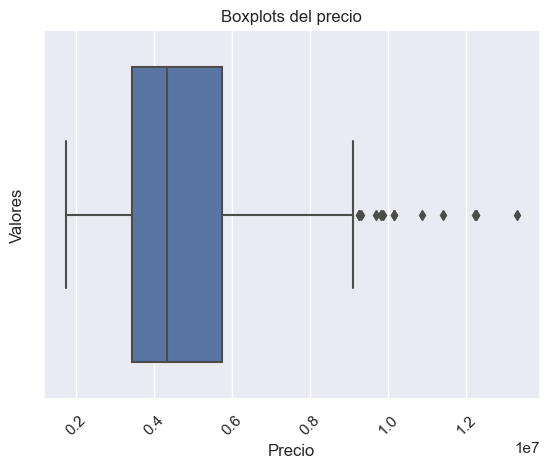

In [1077]:
plt.title('Boxplots del precio')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)#graficar outliers
sns.boxplot(x=df['Precio'])

<Axes: title={'center': 'Boxplots del area'}, xlabel='Area', ylabel='Valores'>

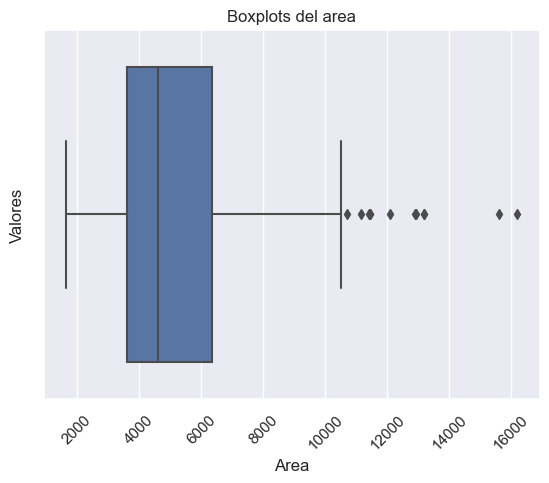

In [1078]:
plt.title('Boxplots del area')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
sns.boxplot(x=df['Area'])

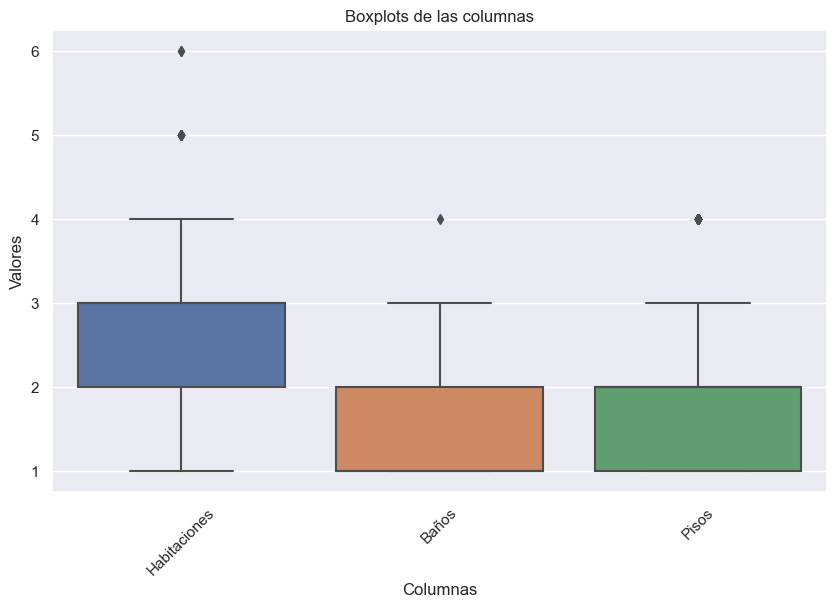

In [1079]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Habitaciones', 'Baños', 'Pisos']])
plt.title('Boxplots de las columnas')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

In [1080]:
df['Habitaciones_total'] = df['Habitaciones'] + df['Baños']
df['Precio_area'] = df['Precio'] / df['Area']

In [1081]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

IQR = Q3 - Q1
multiplier = 1.5

lower_limit = Q1 - multiplier * IQR
upper_limit = Q3 + multiplier * IQR

outliers = (df[numeric_columns] < lower_limit) | (df[numeric_columns] > upper_limit)

df = df[~outliers.any(axis=1, skipna=False)]

# Verificar el DataFrame sin outliers
df.head()

,Precio,Area,Habitaciones,Baños,Pisos,CallePrincipal,HabitacionInvitados,Sotano,CalefaccionAguaCaliente,AireAcondicionado,Estacionamiento,AreaPreferida,EstadoAmueblado,Habitaciones_total,Precio_area
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,5,1516.666667
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished,6,1378.787879
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished,5,1379.283489
21,8680000,7155,3,2,1,yes,yes,yes,no,yes,2,no,unfurnished,5,1213.137666
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,furnished,4,1073.913043


In [1082]:
print("Shape of DataFrame without outliers:", df.shape)

Shape of DataFrame without outliers: (450, 15)


<Axes: title={'center': 'Boxplots del precio'}, xlabel='Precio', ylabel='Valores'>

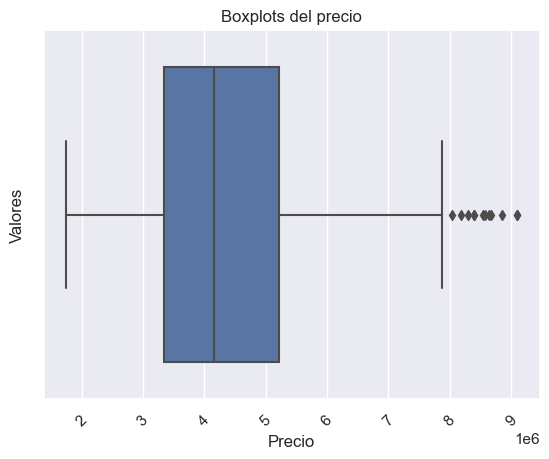

In [1083]:
plt.title('Boxplots del precio')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)#graficar outliers
sns.boxplot(x=df['Precio'])

<Axes: title={'center': 'Boxplots del area'}, xlabel='Area', ylabel='Valores'>

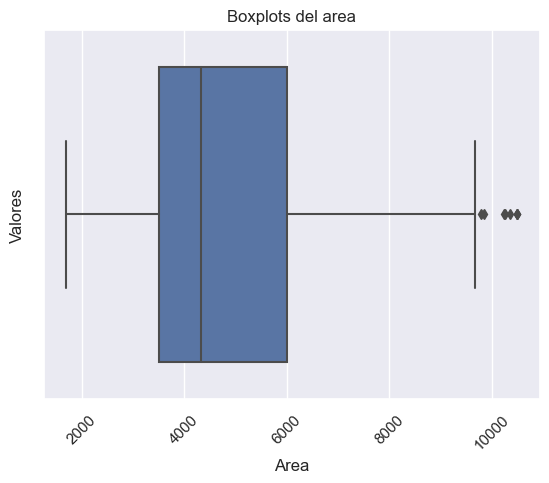

In [1084]:
plt.title('Boxplots del area')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
sns.boxplot(x=df['Area'])

C:\Users\Martín Bravo Sáez\AppData\Local\Temp\ipykernel_16280\1633974100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Precio'], shade=True, color='skyblue', alpha=0.7)


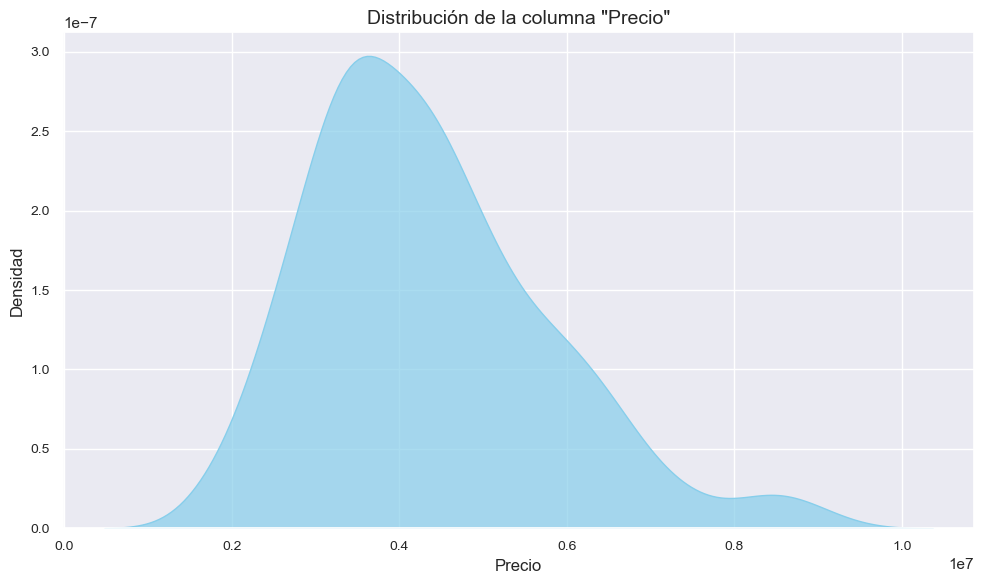

In [1085]:
sns.set(style="darkgrid")

# Visualizar la distribución de las columnas con kde
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['Precio'], shade=True, color='skyblue', alpha=0.7)
plt.title('Distribución de la columna "Precio"', fontsize=14)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

C:\Users\Martín Bravo Sáez\AppData\Local\Temp\ipykernel_16280\2973808961.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Area'], shade=True, color='skyblue', alpha=0.7)


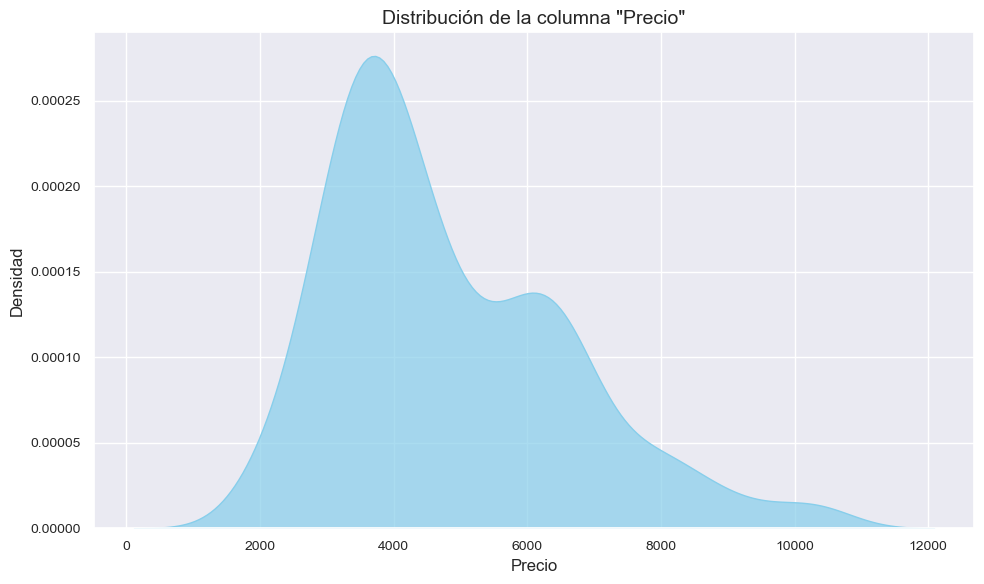

In [1086]:
sns.set(style="darkgrid")

# Visualizar la distribución de las columnas con kde
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['Area'], shade=True, color='skyblue', alpha=0.7)
plt.title('Distribución de la columna "Precio"', fontsize=14)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

C:\Users\Martín Bravo Sáez\AppData\Local\Temp\ipykernel_16280\3311668333.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_normalized['Precio'], shade=True, color='skyblue', alpha=0.3, label='Precio (Normalizado)')
C:\Users\Martín Bravo Sáez\AppData\Local\Temp\ipykernel_16280\3311668333.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_normalized['Area'], shade=True, color='salmon', alpha=0.3, label='Area (Normalizado)')
C:\Users\Martín Bravo Sáez\AppData\Local\Temp\ipykernel_16280\3311668333.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_normalized['Precio_area'], shade=True, color='g

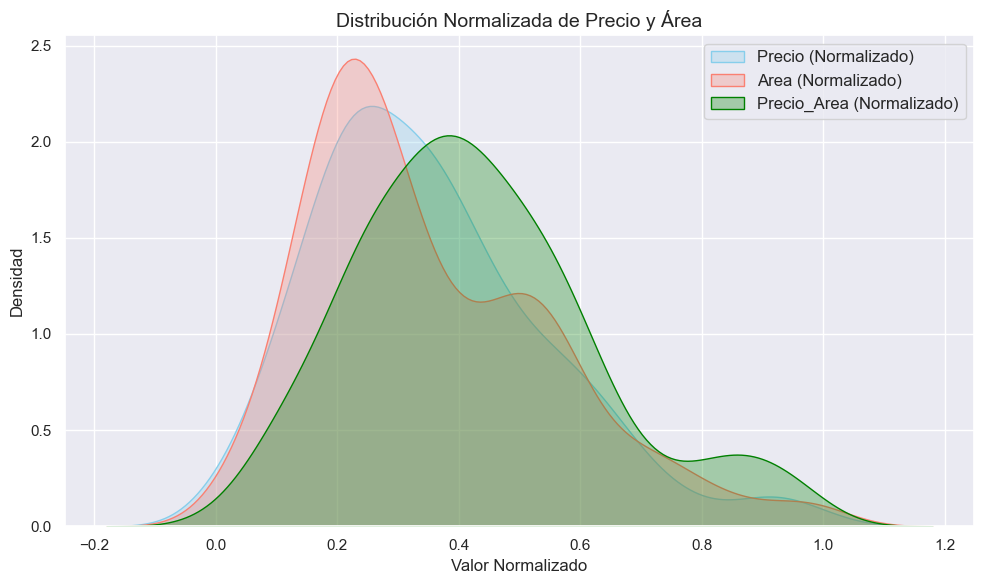

In [1087]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalizar los datos de las columnas 'Precio' y 'Area'
df_normalized = df.copy()  # Crear una copia del DataFrame original
df_normalized[['Precio', 'Area', 'Precio_area']] = scaler.fit_transform(df_normalized[['Precio', 'Area', 'Precio_area']])

# Configurar el estilo de seaborn
sns.set(style="darkgrid")

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Visualizar la distribución normalizada de la columna 'Precio'
sns.kdeplot(data=df_normalized['Precio'], shade=True, color='skyblue', alpha=0.3, label='Precio (Normalizado)')

# Visualizar la distribución normalizada de la columna 'Area'
sns.kdeplot(data=df_normalized['Area'], shade=True, color='salmon', alpha=0.3, label='Area (Normalizado)')

sns.kdeplot(data=df_normalized['Precio_area'], shade=True, color='green', alpha=0.3, label='Precio_Area (Normalizado)')

# Añadir título y etiquetas
plt.title('Distribución Normalizada de Precio y Área', fontsize=14)
plt.xlabel('Valor Normalizado', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [1088]:
correlation = df[['Precio', 'Area', 'Habitaciones', 'Baños', 'Pisos', 'Estacionamiento', 'Habitaciones_total', 'Precio_area']].corr()
correlation

,Precio,Area,Habitaciones,Baños,Pisos,Estacionamiento,Habitaciones_total,Precio_area
Precio,1.000000,0.533345,0.333522,0.417566,0.223172,0.306962,0.446010,0.359234
Area,0.533345,1.000000,0.115952,0.133335,-0.082090,0.298415,0.149361,-0.525947
Habitaciones,0.333522,0.115952,1.000000,0.323440,0.461347,0.081800,0.890173,0.196757
Baños,0.417566,0.133335,0.323440,1.000000,0.197769,0.099460,0.719049,0.254733
Pisos,0.223172,-0.082090,0.461347,0.197769,1.000000,-0.084427,0.434056,0.312399
Estacionamiento,0.306962,0.298415,0.081800,0.099460,-0.084427,1.000000,0.107967,-0.024031
Habitaciones_total,0.446010,0.149361,0.890173,0.719049,0.434056,0.107967,1.000000,0.267160
Precio_area,0.359234,-0.525947,0.196757,0.254733,0.312399,-0.024031,0.267160,1.000000


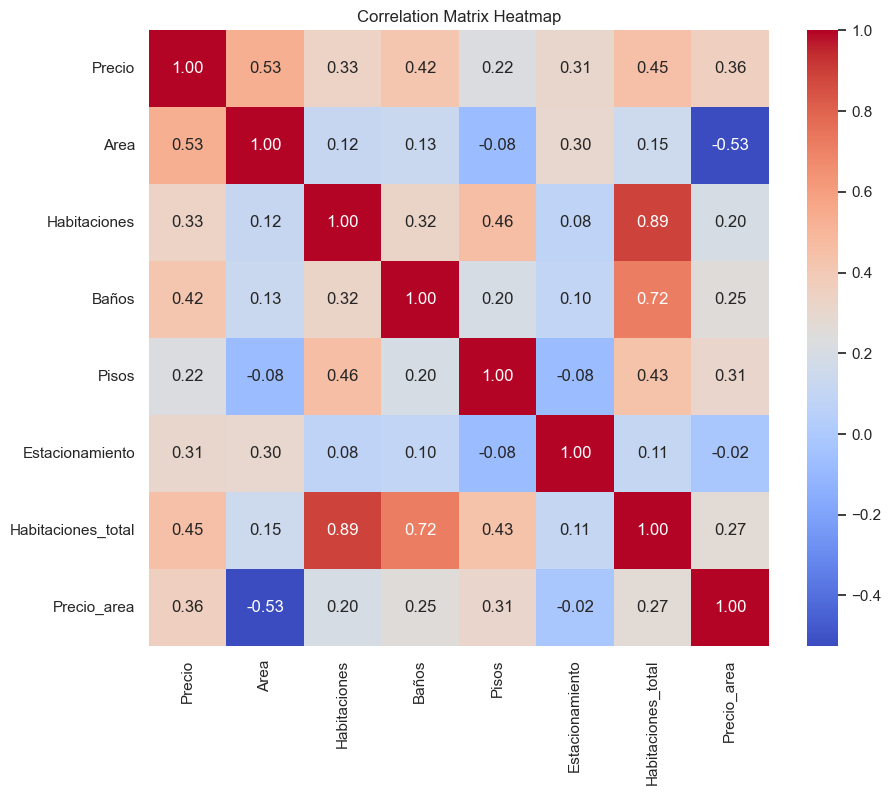

In [1089]:
columnas_numericas = ['Precio', 'Area', 'Habitaciones', 'Baños', 'Pisos', 'Estacionamiento', 'Habitaciones_total', 'Precio_area']

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Modeling & Evaluation

In [1090]:
#Split-out validation dataset
from sklearn.model_selection import train_test_split

X = df.drop('Precio', axis=1)
y = df['Precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (360, 14)
X_test shape: (90, 14)
y_train shape: (360,)
y_test shape: (90,)


In [1091]:
print(X_train.dtypes)

Area                         int64
Habitaciones                 int64
Baños                        int64
Pisos                        int64
CallePrincipal              object
HabitacionInvitados         object
Sotano                      object
CalefaccionAguaCaliente     object
AireAcondicionado           object
Estacionamiento              int64
AreaPreferida               object
EstadoAmueblado             object
Habitaciones_total           int64
Precio_area                float64
dtype: object


In [1092]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
import pandas as pd

# Supongamos que 'X_train', 'X_test', 'y_train' y 'y_test' ya están definidos

# Definir columnas que requieren codificación
columnas_codificar_label = ['CallePrincipal', 'HabitacionInvitados', 'Sotano', 'CalefaccionAguaCaliente',
                            'AireAcondicionado', 'AreaPreferida', 'EstadoAmueblado']

# Codificación con LabelEncoder para el conjunto de entrenamiento y prueba
label_encoder = LabelEncoder()
for columna in columnas_codificar_label:
    X_train[columna] = label_encoder.fit_transform(X_train[columna])
    X_test[columna] = label_encoder.transform(X_test[columna])

# Definir columnas que requieren codificación ordinal
columnas_codificar_ordinal = ['CallePrincipal', 'HabitacionInvitados', 'Sotano', 'CalefaccionAguaCaliente',
                               'AireAcondicionado', 'AreaPreferida', 'EstadoAmueblado']

# Codificación ordinal para el conjunto de entrenamiento y prueba
ordinal_encoder = OrdinalEncoder()
X_train[columnas_codificar_ordinal] = ordinal_encoder.fit_transform(X_train[columnas_codificar_ordinal])
X_test[columnas_codificar_ordinal] = ordinal_encoder.transform(X_test[columnas_codificar_ordinal])

# Normalización de todas las características en el conjunto de entrenamiento
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_train = pd.DataFrame(X_train_normalized, columns=X_train.columns)

# Normalización de todas las características en el conjunto de prueba (usando el mismo escalador)
X_test_normalized = scaler_minmax.transform(X_test)
X_test = pd.DataFrame(X_test_normalized, columns=X_test.columns)

# Verificar los cambios en el conjunto de entrenamiento
print("Train Data:")
X_train.head()

Train Data:


,Area,Habitaciones,Baños,Pisos,CallePrincipal,HabitacionInvitados,Sotano,CalefaccionAguaCaliente,AireAcondicionado,Estacionamiento,AreaPreferida,EstadoAmueblado,Habitaciones_total,Precio_area
0,0.488636,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.333333,0.546703
1,0.488636,0.5,0.0,0.5,1.0,0.0,0.0,0.0,1.0,0.5,0.0,1.0,0.333333,0.600811
2,0.638636,1.0,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.327736
3,0.195455,1.0,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.000000,0.712688
4,0.147727,0.5,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.333333,0.654919


In [1093]:
#Dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Original shape of X_train:", X_train.shape)
print("Reduced shape of X_train:", X_train_pca.shape)


Original shape of X_train: (360, 14)
Reduced shape of X_train: (360, 11)


In [1094]:
#Feature selection
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("Original shape of X_train:", X_train.shape)
print("Selected shape of X_train:", X_train_selected.shape)

Original shape of X_train: (360, 14)
Selected shape of X_train: (360, 5)


In [1095]:
#Modeling
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Crear un modelo de regresión lineal
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Mean Squared Error:", mse_lr)
print("R^2:", r2_lr)

Mean Squared Error: 227358621960.51685
R^2: 0.9108753329134734


In [1096]:
# Crear un modelo de regresión logística
log = LogisticRegression()

# Entrenar el modelo con el conjunto de entrenamiento
log.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred_log = log.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_log)

print("Accuracy:", accuracy)

Accuracy: 0.011111111111111112


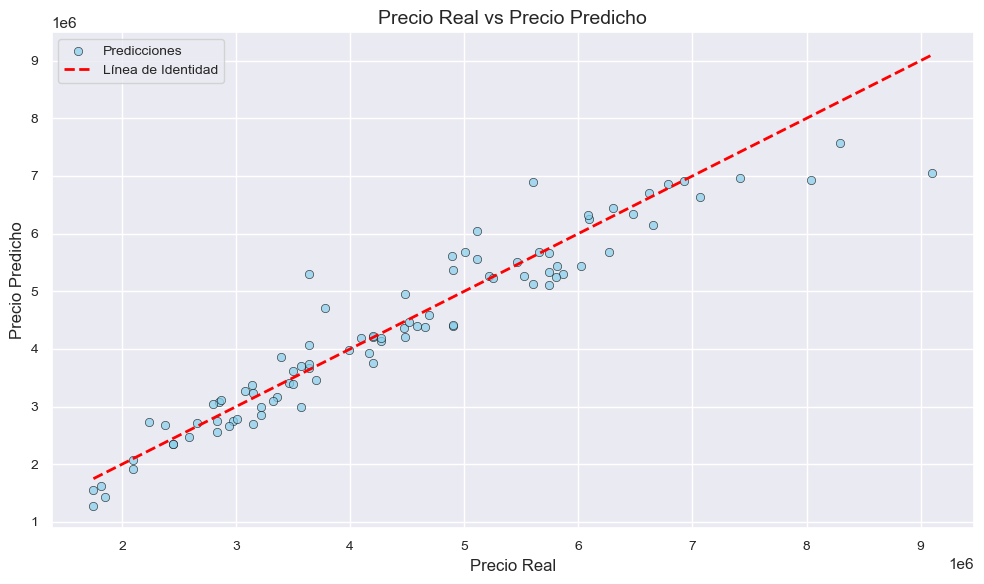

In [1097]:
sns.set_style("darkgrid")

# Chequea linealidad entre Xs e Y
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Precio Real', fontsize=12)
plt.ylabel('Precio Predicho', fontsize=12)
plt.title('Precio Real vs Precio Predicho', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(['Predicciones', 'Línea de Identidad'], loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

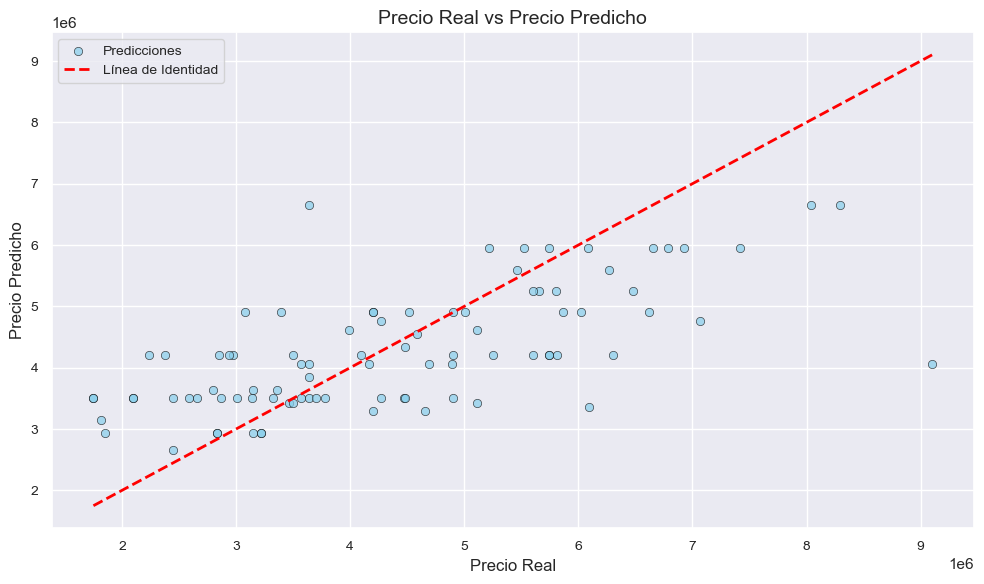

In [1098]:
sns.set_style("darkgrid")

# Chequea linealidad entre Xs e Y
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_log, color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Precio Real', fontsize=12)
plt.ylabel('Precio Predicho', fontsize=12)
plt.title('Precio Real vs Precio Predicho', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(['Predicciones', 'Línea de Identidad'], loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

In [1099]:
# Improve metric--> adding new features (Feature engineering
df['TotalRooms'] = df['Habitaciones'] + df['Baños']

# Split-out validation dataset
X = df.drop('Precio', axis=1)
y = df['Precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

columnas_codificar_label = ['CallePrincipal', 'HabitacionInvitados', 'Sotano', 'CalefaccionAguaCaliente',
                            'AireAcondicionado', 'AreaPreferida', 'EstadoAmueblado']

# Codificación con LabelEncoder para el conjunto de entrenamiento y prueba
label_encoder = LabelEncoder()
for columna in columnas_codificar_label:
    X_train[columna] = label_encoder.fit_transform(X_train[columna])
    X_test[columna] = label_encoder.transform(X_test[columna])

# Definir columnas que requieren codificación ordinal
columnas_codificar_ordinal = ['CallePrincipal', 'HabitacionInvitados', 'Sotano', 'CalefaccionAguaCaliente',
                               'AireAcondicionado', 'AreaPreferida', 'EstadoAmueblado']

# Codificación ordinal para el conjunto de entrenamiento y prueba
ordinal_encoder = OrdinalEncoder()
X_train[columnas_codificar_ordinal] = ordinal_encoder.fit_transform(X_train[columnas_codificar_ordinal])
X_test[columnas_codificar_ordinal] = ordinal_encoder.transform(X_test[columnas_codificar_ordinal])

# Normalización de todas las características en el conjunto de entrenamiento
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_train = pd.DataFrame(X_train_normalized, columns=X_train.columns)

# Normalización de todas las características en el conjunto de prueba (usando el mismo escalador)
X_test_normalized = scaler_minmax.transform(X_test)
X_test = pd.DataFrame(X_test_normalized, columns=X_test.columns)

# Crear un modelo de regresión lineal
lr_2 = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
lr_2.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred_lr_2 = lr_2.predict(X_test)

# Evaluar el modelo
mse_lr2 = mean_squared_error(y_test, y_pred_lr_2)
r2_lr2 = r2_score(y_test, y_pred_lr_2)

print("Mean Squared Error:", mse_lr2)
print("R^2:", r2_lr2)

Mean Squared Error: 227358621960.51663
R^2: 0.9108753329134736


In [1100]:
#Select k best features
selector = SelectKBest(score_func=f_regression, k=10)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("Original shape of X_train:", X_train.shape)
print("Selected shape of X_train:", X_train_selected.shape)

Original shape of X_train: (360, 15)
Selected shape of X_train: (360, 10)


In [1101]:
#Modeling
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Crear un modelo de regresión lineal
model_lrk = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model_lrk.fit(X_train_selected, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred_lrk = model_lrk.predict(X_test_selected)

# Evaluar el modelo
mse_lrk = mean_squared_error(y_test, y_pred_lrk)
r2_lrk = r2_score(y_test, y_pred_lrk)

print("Mean Squared Error:", mse_lrk)
print("R^2:", r2_lrk)

Mean Squared Error: 213591931122.5635
R^2: 0.9162718810066828


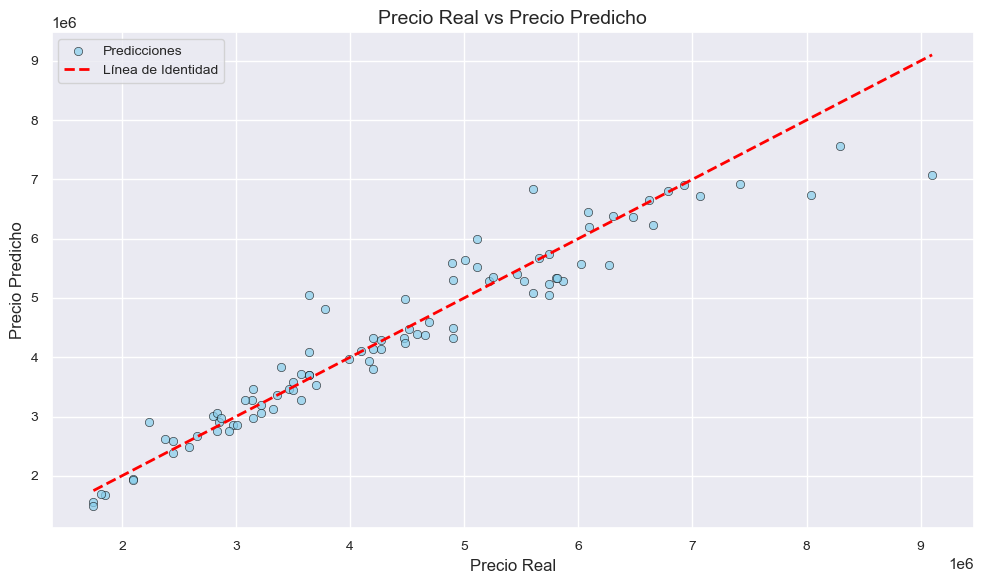

In [1102]:
sns.set_style("darkgrid")

# Chequea linealidad entre Xs e Y
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lrk, color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Precio Real', fontsize=12)
plt.ylabel('Precio Predicho', fontsize=12)
plt.title('Precio Real vs Precio Predicho', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(['Predicciones', 'Línea de Identidad'], loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# El modelo mejora al seleccionar solo 10 características